# __SUMMARY__

In the following section I upload:  
 - _usa_nsp_fees_passes.csv_ which was obtained from [National Service Park API](#https://www.nps.gov/subjects/developer/api-documentation.htm) 
 - _usa_accommodation_with_states_v2.csv_ which I got from [Overpass Turbo](#https://overpass-turbo.eu/)

 Once converted to dataframe, I will clean it so it can be used to merge into master file including USA national park data obtained by other members of this team (wildlife, weather,accessibility features).
 I will also explore these 2 files.
 

## __EXPLORING AND CLEANING DATA__




* * * *


### __Fees and passes__

In [247]:
import pandas as pd

In [250]:
# uploading csv file and displaying it
fees_df = pd.read_csv('data-sourcing/usa_nsp_fees_passes.csv')
fees_df.head(15)

,park_code,price_type,cost,fee_type,pass_category,description,id
0,acad,fee,6.0,Timed Entry Reservation - Location,NaN,Vehicle reservations are not required for any ...,B0ACE361-8899-4098-A238-18BA39FD67C2
1,acad,fee,35.0,Entrance - Private Vehicle,NaN,"Valid for seven days. Admits private, non-comm...",94E30640-D3B6-40D4-9949-07C63CFE636C
2,acad,fee,30.0,Entrance - Motorcycle,NaN,Valid for seven days. Admits one or two passen...,A6D7D0BD-5064-4018-ACA6-471AAC4B8301
3,acad,fee,20.0,Entrance - Per Person,NaN,Valid for seven days. Admits one individual wi...,CE8B4FBB-3410-49D1-97DF-B4F019CDD058
4,acad,fee,0.0,Entrance - Education/Academic Groups,NaN,School groups and other academic institutions ...,BBA5FD20-F7E2-4185-84E9-CECEAB42C43B
5,acad,fee,0.0,Entrance - Non-commercial Groups,NaN,"Groups entering Acadia by bus, van, or other h...",8B5FB8A4-46C0-43A1-BCEF-3D8D35E1A89F
6,acad,fee,0.0,Commercial Entrance - Per Person,NaN,Are you operating a business that provides lei...,46D75731-D4BF-45DE-88FC-54C93ADBB9AB
7,acad,pass,70.0,NaN,Annual Entrance - Park,The Acadia Annual Pass is valid only at Acadia...,F647C604-6000-4454-A9FB-6147436E8A7C
8,adam,fee,1.0,Timed Entry Reservation - Location,NaN,The park offers tours of the historic homes. A...,3731EBA3-EF53-403B-8C27-F02EBA8D5CEB
9,adam,fee,15.0,Entrance - Per Person,NaN,Entrance into the historic homes at Adams Nati...,E08949D2-8971-43EF-B9F1-27CB13016466


In [251]:
# checking how many rows are empty
fees_df.isnull().sum() 

park_code          0
price_type         0
cost               0
fee_type          95
pass_category    537
description        0
id                 0
dtype: int64

In [252]:
#checking how many different unique values are in column pass_category
fees_df.pass_category.unique()

array([nan, 'Annual Entrance - Park'], dtype=object)

In [235]:
# check if all price_type values as "pass" has value in column pass_category 
filtered_fees_df = fees_df[fees_df['pass_category'] == 'Annual Entrance - Park']
filtered_fees_df.info()

# this means that there are 95 records with Annual Entrance - Park, all of them have cost against them, and all of them have NaN value in column fee_type.
# this means I can delete pass_category column, and populate "Annual Entrance Pass" into fee_type column to replace NaN

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 7 to 631
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   park_code      95 non-null     object 
 1   price_type     95 non-null     object 
 2   cost           95 non-null     float64
 3   fee_type       0 non-null      object 
 4   pass_category  95 non-null     object 
 5   description    95 non-null     object 
 6   id             95 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.9+ KB


In [253]:
# delete unncessary columns, as pass_category have only one unique value  - this column can be deleted, and we can also delete column price_type as I will populate "Annual Entrance Pass" into column fee_type
fees_df.drop(columns=['id','description','pass_category','price_type'],inplace=True) 

In [54]:
fees_df

,park_code,cost,fee_type
0,acad,6.0,Timed Entry Reservation - Location
1,acad,35.0,Entrance - Private Vehicle
2,acad,30.0,Entrance - Motorcycle
3,acad,20.0,Entrance - Per Person
4,acad,0.0,Entrance - Education/Academic Groups
...,...,...,...
623,zion,70.0,Commercial Entrance - Van
624,zion,80.0,Commercial Entrance - Mini-bus
625,zion,190.0,Commercial Entrance - Motor Coach
626,zion,20.0,Commercial Entrance - Per Person


In [254]:
# number of unique values in fee_type column
fees_df.fee_type.nunique()

14

In [255]:
# getting unique values in column fee type incl. Nan
fees_df.fee_type.unique() 

array(['Timed Entry Reservation - Location', 'Entrance - Private Vehicle',
       'Entrance - Motorcycle', 'Entrance - Per Person',
       'Entrance - Education/Academic Groups',
       'Entrance - Non-commercial Groups',
       'Commercial Entrance - Per Person', nan,
       'Commercial Entrance - Motor Coach',
       'Commercial Entrance - Mini-bus', 'Commercial Entrance - Sedan',
       'Timed Entry Reservation - Park', 'Commercial Entrance - Van',
       'Entrance - Snowmobile',
       'Timed Entry Reservation - Park & Location'], dtype=object)

In [256]:
#filter on rows with nan values in fee_type column
filtered_fees_df = fees_df[fees_df['fee_type'].isna()]
filtered_fees_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 7 to 631
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   park_code  95 non-null     object 
 1   cost       95 non-null     float64
 2   fee_type   0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


In [257]:
fees_df

,park_code,cost,fee_type
0,acad,6.0,Timed Entry Reservation - Location
1,acad,35.0,Entrance - Private Vehicle
2,acad,30.0,Entrance - Motorcycle
3,acad,20.0,Entrance - Per Person
4,acad,0.0,Entrance - Education/Academic Groups
...,...,...,...
627,zion,70.0,Commercial Entrance - Van
628,zion,80.0,Commercial Entrance - Mini-bus
629,zion,190.0,Commercial Entrance - Motor Coach
630,zion,20.0,Commercial Entrance - Per Person


In [258]:
# replacing NaN in fee_type column to Annual Entrance
fees_df.fillna({'fee_type':'Annual Entrance Pass'},inplace=True) 

In [242]:
fees_df

,park_code,cost,fee_type
0,acad,6.0,Timed Entry Reservation - Location
1,acad,35.0,Entrance - Private Vehicle
2,acad,30.0,Entrance - Motorcycle
3,acad,20.0,Entrance - Per Person
4,acad,0.0,Entrance - Education/Academic Groups
...,...,...,...
627,zion,70.0,Commercial Entrance - Van
628,zion,80.0,Commercial Entrance - Mini-bus
629,zion,190.0,Commercial Entrance - Motor Coach
630,zion,20.0,Commercial Entrance - Per Person


In [259]:
#rename column "fee_type" to "cost_type" as it includes annual entrance pass
#renaming "park_code" to "Park Code" to allow merging with Rosie's file
fees_df.rename(columns={'fee_type':'cost_type','park_code':'Park Code'},inplace=True)
fees_df

,Park Code,cost,cost_type
0,acad,6.0,Timed Entry Reservation - Location
1,acad,35.0,Entrance - Private Vehicle
2,acad,30.0,Entrance - Motorcycle
3,acad,20.0,Entrance - Per Person
4,acad,0.0,Entrance - Education/Academic Groups
...,...,...,...
627,zion,70.0,Commercial Entrance - Van
628,zion,80.0,Commercial Entrance - Mini-bus
629,zion,190.0,Commercial Entrance - Motor Coach
630,zion,20.0,Commercial Entrance - Per Person


In [260]:
#checking there are no NaN value
fees_df.cost_type.unique()

array(['Timed Entry Reservation - Location', 'Entrance - Private Vehicle',
       'Entrance - Motorcycle', 'Entrance - Per Person',
       'Entrance - Education/Academic Groups',
       'Entrance - Non-commercial Groups',
       'Commercial Entrance - Per Person', 'Annual Entrance Pass',
       'Commercial Entrance - Motor Coach',
       'Commercial Entrance - Mini-bus', 'Commercial Entrance - Sedan',
       'Timed Entry Reservation - Park', 'Commercial Entrance - Van',
       'Entrance - Snowmobile',
       'Timed Entry Reservation - Park & Location'], dtype=object)

In [261]:
# number of unique park codes -> parks
fees_df['Park Code'].nunique()

118

In [262]:
# frequency of unqiue values in fee type
for index, value in fees_df['cost_type'].dropna().value_counts().items():
    percentage = value/(fees_df['Park Code'].nunique())*100
    print(f"{index} {value} {percentage:.0f}%")

# outcome: most parks,92%, have price information regading single entrance fees per person/vehicle and annual entrance pass (81%). 

Entrance - Per Person 108 92%
Annual Entrance Pass 95 81%
Entrance - Private Vehicle 78 66%
Entrance - Motorcycle 73 62%
Commercial Entrance - Motor Coach 47 40%
Commercial Entrance - Van 45 38%
Commercial Entrance - Mini-bus 44 37%
Commercial Entrance - Sedan 42 36%
Entrance - Education/Academic Groups 28 24%
Entrance - Non-commercial Groups 27 23%
Timed Entry Reservation - Location 22 19%
Commercial Entrance - Per Person 14 12%
Timed Entry Reservation - Park 4 3%
Entrance - Snowmobile 4 3%
Timed Entry Reservation - Park & Location 1 1%


In [263]:
fees_df.cost_type.unique()

array(['Timed Entry Reservation - Location', 'Entrance - Private Vehicle',
       'Entrance - Motorcycle', 'Entrance - Per Person',
       'Entrance - Education/Academic Groups',
       'Entrance - Non-commercial Groups',
       'Commercial Entrance - Per Person', 'Annual Entrance Pass',
       'Commercial Entrance - Motor Coach',
       'Commercial Entrance - Mini-bus', 'Commercial Entrance - Sedan',
       'Timed Entry Reservation - Park', 'Commercial Entrance - Van',
       'Entrance - Snowmobile',
       'Timed Entry Reservation - Park & Location'], dtype=object)

In [264]:
# Timed Entry values in column cost_type can be changed to one Timed Entry as these are tickets and occur only 27 times
fees_df.replace({'cost_type':{'Timed Entry Reservation - Location':'Timed Entry Reservation', 'Timed Entry Reservation - Park':'Timed Entry Reservation','Timed Entry Reservation - Park & Location':'Timed Entry Reservation'}},inplace=True)
fees_df.cost_type.unique()

array(['Timed Entry Reservation', 'Entrance - Private Vehicle',
       'Entrance - Motorcycle', 'Entrance - Per Person',
       'Entrance - Education/Academic Groups',
       'Entrance - Non-commercial Groups',
       'Commercial Entrance - Per Person', 'Annual Entrance Pass',
       'Commercial Entrance - Motor Coach',
       'Commercial Entrance - Mini-bus', 'Commercial Entrance - Sedan',
       'Commercial Entrance - Van', 'Entrance - Snowmobile'], dtype=object)

In [265]:
#checking Times Entry values changed
fees_df.head(15)

,Park Code,cost,cost_type
0,acad,6.0,Timed Entry Reservation
1,acad,35.0,Entrance - Private Vehicle
2,acad,30.0,Entrance - Motorcycle
3,acad,20.0,Entrance - Per Person
4,acad,0.0,Entrance - Education/Academic Groups
5,acad,0.0,Entrance - Non-commercial Groups
6,acad,0.0,Commercial Entrance - Per Person
7,acad,70.0,Annual Entrance Pass
8,adam,1.0,Timed Entry Reservation
9,adam,15.0,Entrance - Per Person


In [266]:
# Need to create one row per park
# pivoting the dataframe 

pivoted_fees_df = fees_df.pivot_table(index=['Park Code'],columns=['cost_type'],values='cost')
pivoted_fees_df

cost_type,Annual Entrance Pass,Commercial Entrance - Mini-bus,Commercial Entrance - Motor Coach,Commercial Entrance - Per Person,Commercial Entrance - Sedan,Commercial Entrance - Van,Entrance - Education/Academic Groups,Entrance - Motorcycle,Entrance - Non-commercial Groups,Entrance - Per Person,Entrance - Private Vehicle,Entrance - Snowmobile,Timed Entry Reservation
Park Code,,,,,,,,,,,,,
acad,70.0,NaN,NaN,0.0,NaN,NaN,0.0,30.0,0.0,20.0,35.0,NaN,6.0
adam,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0
anti,35.0,40.0,100.0,NaN,25.0,NaN,0.0,15.0,NaN,10.0,20.0,NaN,NaN
arch,55.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,15.0,30.0,NaN,2.0
asis,45.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,0.0,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wupa,45.0,100.0,100.0,NaN,28.0,40.0,0.0,20.0,15.0,15.0,25.0,NaN,NaN
yell,70.0,200.0,300.0,NaN,20.0,125.0,NaN,30.0,20.0,20.0,35.0,30.0,NaN
york,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN


In [267]:
filtered_df = pivoted_fees_df.filter(items=['tica'],axis=0) # filtering by index 
filtered_df

cost_type,Annual Entrance Pass,Commercial Entrance - Mini-bus,Commercial Entrance - Motor Coach,Commercial Entrance - Per Person,Commercial Entrance - Sedan,Commercial Entrance - Van,Entrance - Education/Academic Groups,Entrance - Motorcycle,Entrance - Non-commercial Groups,Entrance - Per Person,Entrance - Private Vehicle,Entrance - Snowmobile,Timed Entry Reservation
tica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0


In [35]:
#creating cleaned_csv file
# index= True because I want to save index column 
pivoted_fees_df.to_csv('cleaned_usa_nsp_fees_passes.csv',index=True) 

### __Accommodation__

In [268]:
import pandas as pd

In [272]:
#using v2 csv file as this inludes state column populate by team member Belinda who wrote a code enaing to obtain State data from longitude and latitude
accom_df = pd.read_csv('./usa_accommodation_with_states_v2.csv')
accom_df.head(10)

,wheelchair,longitude,latitude,accomm_type,state,name,street,house_number,city,website,phone,State
0,yes,-122.186176,47.767743,hotel,WA,Country Inn & Suites,North Creek Parkway,19333,Bothell,https://www.radissonhotels.com/en-us/hotels/co...,-6466,Washington
1,yes,-119.046088,35.380000,hotel,CA,"The Hourglass Hotel, Ascend Hotel Collection",Camino del Rio Court,2400,Bakersfield,NaN,-1668,California
2,yes,-119.042141,35.384679,hotel,NaN,Red Lion Hotel Bakersfield,NaN,NaN,NaN,NaN,NaN,California
3,yes,-84.370197,39.283479,hotel,OH,DoubleTree Suites Hotel Cincinnati - Blue Ash,East Kemper Road,6300,Sharonville,https://www.hilton.com/en/hotels/cvgkrdt-doubl...,+1 513-489-3636,Ohio
4,yes,-117.413997,47.661084,hotel,NaN,DoubleTree by Hilton Hotel Spokane City Center,North Spokane Falls Court,322,Spokane,https://doubletree3.hilton.com/en/hotels/washi...,-10563,Washington
5,yes,-83.377685,33.944574,hotel,GA,University of Georgia Center for Continuing Ed...,South Lumpkin Street,1197,Athens,NaN,NaN,Georgia
6,yes,-77.017409,38.780926,hotel,MD,Gaylord National Resort and Convention Center,Waterfront Street,201,National Harbor,NaN,301-965-2000,Maryland
7,yes,-82.682332,27.892947,hotel,NaN,Red Roof,Ulmerton Road,3580,Clearwater,NaN,NaN,Florida
8,yes,-95.866637,36.167139,caravan_site,NaN,Mingo RV Park,NaN,NaN,NaN,https://www.mingorvpark.com/,-10573,Oklahoma
9,yes,-94.922644,39.342434,hotel,KS,Holiday Inn Express at Hoge Hall,Grant Avenue,214,Fort Leavenworth,https://www.ihg.com/armyhotels/hotels/us/en/fo...,NaN,Kansas


In [273]:
accom_df.info() 

# outcome: 2524 entries, however only 2452 names of accommodation - > to locate the accommodation at least into the same state as National Park we need name of accommodation and state as the bear minimum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wheelchair    2524 non-null   object 
 1   longitude     2524 non-null   float64
 2   latitude      2524 non-null   float64
 3   accomm_type   2524 non-null   object 
 4   state         1900 non-null   object 
 5   name          2452 non-null   object 
 6   street        2060 non-null   object 
 7   house_number  2038 non-null   object 
 8   city          1988 non-null   object 
 9   website       1901 non-null   object 
 10  phone         1807 non-null   object 
 11  State         2524 non-null   object 
dtypes: float64(2), object(10)
memory usage: 236.8+ KB


In [274]:
# getting rid of unnecessary columns -> keep last column State that Belinda's populated with her code from lat long - it is more accurate and has approx. 600 more non-null values
accom_df.drop(columns=['street','house_number','website','phone','state'],inplace=True)
accom_df.head()

,wheelchair,longitude,latitude,accomm_type,name,city,State
0,yes,-122.186176,47.767743,hotel,Country Inn & Suites,Bothell,Washington
1,yes,-119.046088,35.380000,hotel,"The Hourglass Hotel, Ascend Hotel Collection",Bakersfield,California
2,yes,-119.042141,35.384679,hotel,Red Lion Hotel Bakersfield,NaN,California
3,yes,-84.370197,39.283479,hotel,DoubleTree Suites Hotel Cincinnati - Blue Ash,Sharonville,Ohio
4,yes,-117.413997,47.661084,hotel,DoubleTree by Hilton Hotel Spokane City Center,Spokane,Washington


In [275]:
accom_df.shape

(2524, 7)

In [276]:
accom_df.info()

#outcome: we have 2524 records state, but only 2452 with name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheelchair   2524 non-null   object 
 1   longitude    2524 non-null   float64
 2   latitude     2524 non-null   float64
 3   accomm_type  2524 non-null   object 
 4   name         2452 non-null   object 
 5   city         1988 non-null   object 
 6   State        2524 non-null   object 
dtypes: float64(2), object(5)
memory usage: 138.2+ KB


In [277]:
# all different type of accommodation 
accom_df.accomm_type.unique() 

array(['hotel', 'caravan_site', 'camp_site', 'hostel', 'guest_house',
       'apartment'], dtype=object)

In [278]:
#dropping records with state but no name of accommodation
accom_df.dropna(subset=['name'], inplace=True)

In [279]:
accom_df.info() 

# outcome: all records have state and name 

<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheelchair   2452 non-null   object 
 1   longitude    2452 non-null   float64
 2   latitude     2452 non-null   float64
 3   accomm_type  2452 non-null   object 
 4   name         2452 non-null   object 
 5   city         1971 non-null   object 
 6   State        2452 non-null   object 
dtypes: float64(2), object(5)
memory usage: 153.2+ KB


In [280]:
#Checking all unique names of States
accom_df.State.unique()

#outcome: there is 'unknown' 

array(['Washington', 'California', 'Ohio', 'Georgia', 'Maryland',
       'Florida', 'Oklahoma', 'Kansas', 'Texas', 'Massachusetts',
       'Mississippi', 'Arizona', 'Hawaii', 'Louisiana', 'Michigan',
       'North Carolina', 'Illinois', 'Indiana', 'Nevada', 'Colorado',
       'South Carolina', 'Tennessee', 'Idaho', 'Wisconsin', 'Montana',
       'Pennsylvania', 'Guam', 'New York', 'West Virginia', 'Maine',
       'Nebraska', 'New Jersey', 'Virginia', 'Connecticut', 'Alaska',
       'Utah', 'Minnesota', 'Missouri', 'Oregon', 'District of Columbia',
       'Kentucky', 'Puerto Rico', 'New Hampshire', 'Delaware', 'Wyoming',
       'Alabama', 'South Dakota', 'Arkansas', 'Vermont', 'Rhode Island',
       'Iowa', 'New Mexico', 'Northern Mariana Islands', 'Unknown'],
      dtype=object)

In [281]:
accom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheelchair   2452 non-null   object 
 1   longitude    2452 non-null   float64
 2   latitude     2452 non-null   float64
 3   accomm_type  2452 non-null   object 
 4   name         2452 non-null   object 
 5   city         1971 non-null   object 
 6   State        2452 non-null   object 
dtypes: float64(2), object(5)
memory usage: 153.2+ KB


In [282]:
# remove unknown state
accom_df = accom_df.drop(accom_df[accom_df['State'] == 'Unknown'].index)


In [283]:
accom_df.info()

#outcome: one record dropped

<class 'pandas.core.frame.DataFrame'>
Index: 2451 entries, 0 to 2523
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheelchair   2451 non-null   object 
 1   longitude    2451 non-null   float64
 2   latitude     2451 non-null   float64
 3   accomm_type  2451 non-null   object 
 4   name         2451 non-null   object 
 5   city         1971 non-null   object 
 6   State        2451 non-null   object 
dtypes: float64(2), object(5)
memory usage: 153.2+ KB


In [117]:
# saving the cleaned data into csv file ready to be merged into master file 
accom_df.to_csv('cleaned_usa_accommodation.csv',index=False) 

## __VISUALISING DATA__

* * *

### __Fees and passes__

In [284]:
import matplotlib.pyplot as plt

In [37]:
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')
cleaned_fees

,Park Code,Annual Entrance Pass,Commercial Entrance - Mini-bus,Commercial Entrance - Motor Coach,Commercial Entrance - Per Person,Commercial Entrance - Sedan,Commercial Entrance - Van,Entrance - Education/Academic Groups,Entrance - Motorcycle,Entrance - Non-commercial Groups,Entrance - Per Person,Entrance - Private Vehicle,Entrance - Snowmobile,Timed Entry Reservation
0,acad,70.0,NaN,NaN,0.0,NaN,NaN,0.0,30.0,0.0,20.0,35.0,NaN,6.0
1,adam,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0
2,anti,35.0,40.0,100.0,NaN,25.0,NaN,0.0,15.0,NaN,10.0,20.0,NaN,NaN
3,arch,55.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,15.0,30.0,NaN,2.0
4,asis,45.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,0.0,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,wupa,45.0,100.0,100.0,NaN,28.0,40.0,0.0,20.0,15.0,15.0,25.0,NaN,NaN
114,yell,70.0,200.0,300.0,NaN,20.0,125.0,NaN,30.0,20.0,20.0,35.0,30.0,NaN
115,york,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
116,yose,70.0,200.0,300.0,20.0,25.0,125.0,0.0,30.0,300.0,20.0,35.0,NaN,2.0


#### Annual Pass

In [155]:
import pandas as pd
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')

cleaned_fees['Annual Entrance Pass'].unique()

#outcome: the annual entrance pass ranges from $35 to $70. Let's check what is the most common annual pass cost in the chart below.

array([70., 45., 35., 55., nan, 60., 40.])

In [156]:
# total number of parks with data against "Annual Entrance Pass"
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')
(cleaned_fees['Annual Entrance Pass'].value_counts()).sum()

#outcome: There are 94 parks with data against "Annual Entrance Pass"

np.int64(94)

In [157]:
# frequency of unqiue values in Annual Entrance Pass column
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')
 
for index, value in cleaned_fees['Annual Entrance Pass'].value_counts().items():
    total = (cleaned_fees['Annual Entrance Pass'].value_counts()).sum()
    percentage = value/total*100
    print(f"{index} {value} {percentage:.0f}%")

45.0 34 36%
35.0 22 23%
55.0 22 23%
70.0 11 12%
40.0 3 3%
60.0 2 2%


Text(0, 0.5, 'Number of parks')

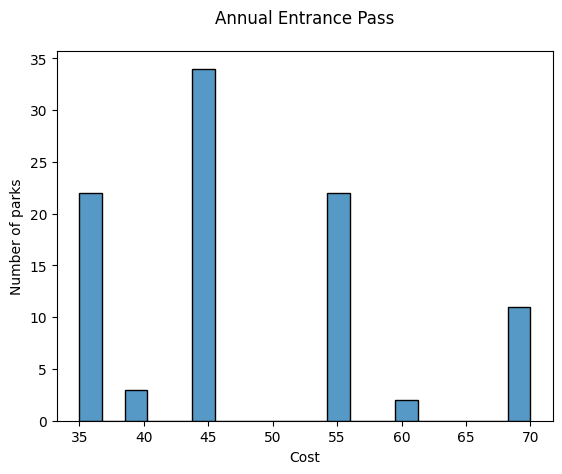

In [158]:
# checking frequency of certain level of annual entrance pass
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')

#plotting
sns.histplot(cleaned_fees['Annual Entrance Pass'], bins = 20) # seaborn 
#cleaned_fees['Annual Entrance Pass'].plot.hist(bins=15,color='skyblue',align='mid')
plt.title('Annual Entrance Pass',pad=20)
plt.xlabel('Cost')
plt.ylabel('Number of parks')
#plt.grid(linestyle='dashed')

#outcome: We have annual pass data for 94 parks. Most parks' annual entrance fee costs between $35 to $45 (59% parks) with the most common fee at $45 (36%). The most you can pay for the annual entrance pass is $70. 
        

#### What is the most common single entrance fee per park

In [159]:
# total number of parks with data against "Entrance - Per Person"
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')
(cleaned_fees['Entrance - Per Person'].value_counts()).sum()

#outcome: There are 103 parks with data against "Entrance - Per Person"

np.int64(103)

In [160]:
# frequency of unqiue values in single entrance
cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')
 
for index, value in cleaned_fees['Entrance - Per Person'].value_counts().items():
    #print(index,value)
    total = (cleaned_fees['Entrance - Per Person'].value_counts()).sum()
    percentage = value/total*100
    print(f"{index} {value} {percentage:.0f}%")
    

15.0 53 51%
10.0 32 31%
20.0 10 10%
5.0 2 2%
0.0 1 1%
13.333333333333334 1 1%
7.0 1 1%
12.5 1 1%
30.0 1 1%
17.5 1 1%


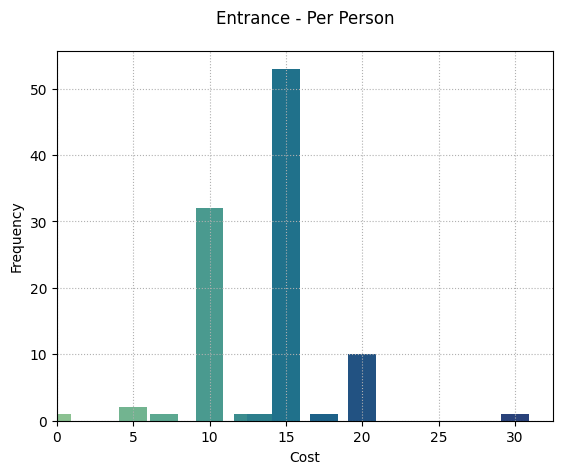

In [161]:
# we know from exploring data in previous part of this notebook - cells 64 & 65 - that the most parks in our data set (91%) have "Entrance - Per Person" information. Therefore we are going to see what level of this fee is the most common in our dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_fees = pd.read_csv('./cleaned_usa_nsp_fees_passes.csv')

#get frequency count 
frequency_counts = cleaned_fees['Entrance - Per Person'].value_counts().sort_index()

#get colour palette from seaborn
bar_color = sns.color_palette('crest',len(frequency_counts))
plt.bar(frequency_counts.index, frequency_counts.values, color=bar_color,width=1.8)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Entrance - Per Person',pad=20)
plt.grid(linestyle='dotted')
plt.xlim(0) # start x-axis at 0
plt.show()

#outcome: We have single entrance fee data f0r 103 parks in our dataset. The most common entrance fee is $15 dollars per person (53 parks -> 51%) followed by $10 with 32 parks (31%) at this level.  



### __Accommodation__

In [162]:
import pandas as pd
accom = pd.read_csv('cleaned_usa_accommodation.csv')
accom


,wheelchair,longitude,latitude,accomm_type,name,city,State
0,yes,-122.186176,47.767743,hotel,Country Inn & Suites,Bothell,Washington
1,yes,-119.046088,35.380000,hotel,"The Hourglass Hotel, Ascend Hotel Collection",Bakersfield,California
2,yes,-119.042141,35.384679,hotel,Red Lion Hotel Bakersfield,NaN,California
3,yes,-84.370197,39.283479,hotel,DoubleTree Suites Hotel Cincinnati - Blue Ash,Sharonville,Ohio
4,yes,-117.413997,47.661084,hotel,DoubleTree by Hilton Hotel Spokane City Center,Spokane,Washington
...,...,...,...,...,...,...,...
2446,yes,-82.182183,36.596093,hotel,The Bristol Hotel,Bristol,Virginia
2447,yes,-87.660611,45.078026,hotel,Holiday Inn Express,Marinette,Wisconsin
2448,limited,-84.401166,33.758857,hotel,Signia by Hilton Atlanta Georgia World Congres...,Atlanta,Georgia
2449,limited,-84.401166,33.758857,hotel,Signia by Hilton Atlanta Georgia World Congres...,Atlanta,Georgia


In [150]:
#checking if any duplicates
accom[['wheelchair','longitude','latitude','accomm_type','name','city','State']].nunique()

#outcome: it seems the name of the accommodation is duplicated as there are only 2,039 unique records vs. 2450 unqiue geocoordinates, we need to explore it and remove it from our dataset

wheelchair        2
longitude      2450
latitude       2450
accomm_type       6
name           2039
city            825
State            53
dtype: int64

In [163]:
#have a quick look on rows with duplicated names
accom_duplicated = accom[accom['name'].duplicated() == True]
accom_duplicated.sort_values('name')

#outcome: from a quick look, we can see the same name accommodation differs slightly in geocordinates therefore we need to remove from our dataset any accommodation with duplication based on name

,wheelchair,longitude,latitude,accomm_type,name,city,State
2416,yes,-73.990300,40.755643,hotel,AC Hotel,New York,New York
1580,yes,-97.801802,30.475055,hotel,Aloft,Cedar Park,Texas
1792,yes,-82.541500,27.334174,hotel,Aloft,Sarasota,Florida
349,yes,-81.467501,28.452638,hotel,Baymont,Orlando,Florida
1916,yes,-84.606833,33.774732,hotel,Baymont,Lithia Springs,Georgia
...,...,...,...,...,...,...,...
836,limited,-87.286113,36.598784,hotel,Travelodge,Clarksville,Tennessee
563,yes,-71.387660,42.297910,hotel,Travelodge,Natick,Massachusetts
1068,yes,-97.745907,30.223002,hotel,Wyndham Garden,Austin,Texas
2255,yes,-73.984980,40.761530,hotel,citizenM,NaN,New York


In [164]:
#dropping records with the same name of accommodation
accom_without_dupl = accom.drop_duplicates('name',keep='first')
accom_without_dupl[['wheelchair','longitude','latitude','accomm_type','name','city','State']].nunique()

# outcome: we have 2,039 unique records 

wheelchair        2
longitude      2039
latitude       2039
accomm_type       6
name           2039
city            706
State            53
dtype: int64

#### Frequency of accessible accommodation in our data set

In [174]:
accom_without_dupl.accomm_type.value_counts()

accomm_type
hotel           1693
camp_site        218
caravan_site      66
guest_house       34
hostel            14
apartment         14
Name: count, dtype: int64

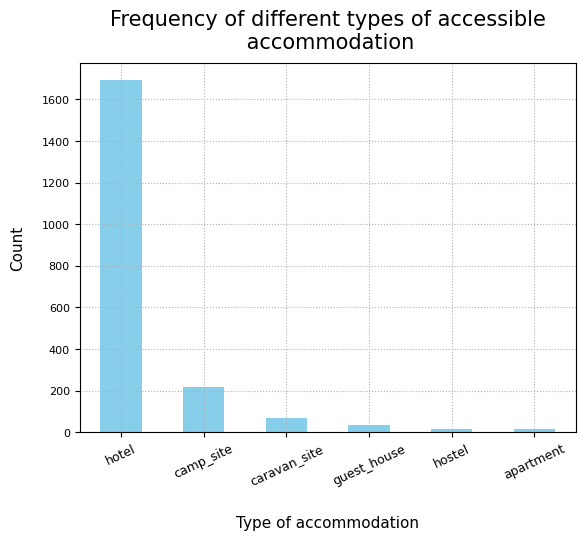

In [168]:

accom_without_dupl['accomm_type'].value_counts().plot.bar(color='skyblue')
plt.grid(True,linestyle='dotted')
plt.xticks(rotation=25,fontsize=9)
plt.yticks(fontsize=8)
plt.xlabel('Type of accommodation',fontsize=11,labelpad=20)
plt.ylabel('Count',fontsize=11,labelpad=12)
plt.title('Frequency of different types of accessible\n accommodation',fontsize=15,pad=10,loc='center')

plt.show()

#outcome: the most common type of wheelchair accessible accommodation in our dataset is hotel with 83% records followed by camping and caravane sites ar 14%. 


#### Number of accessible accommodation per state (in this particular dataset from Overpass Turbo)

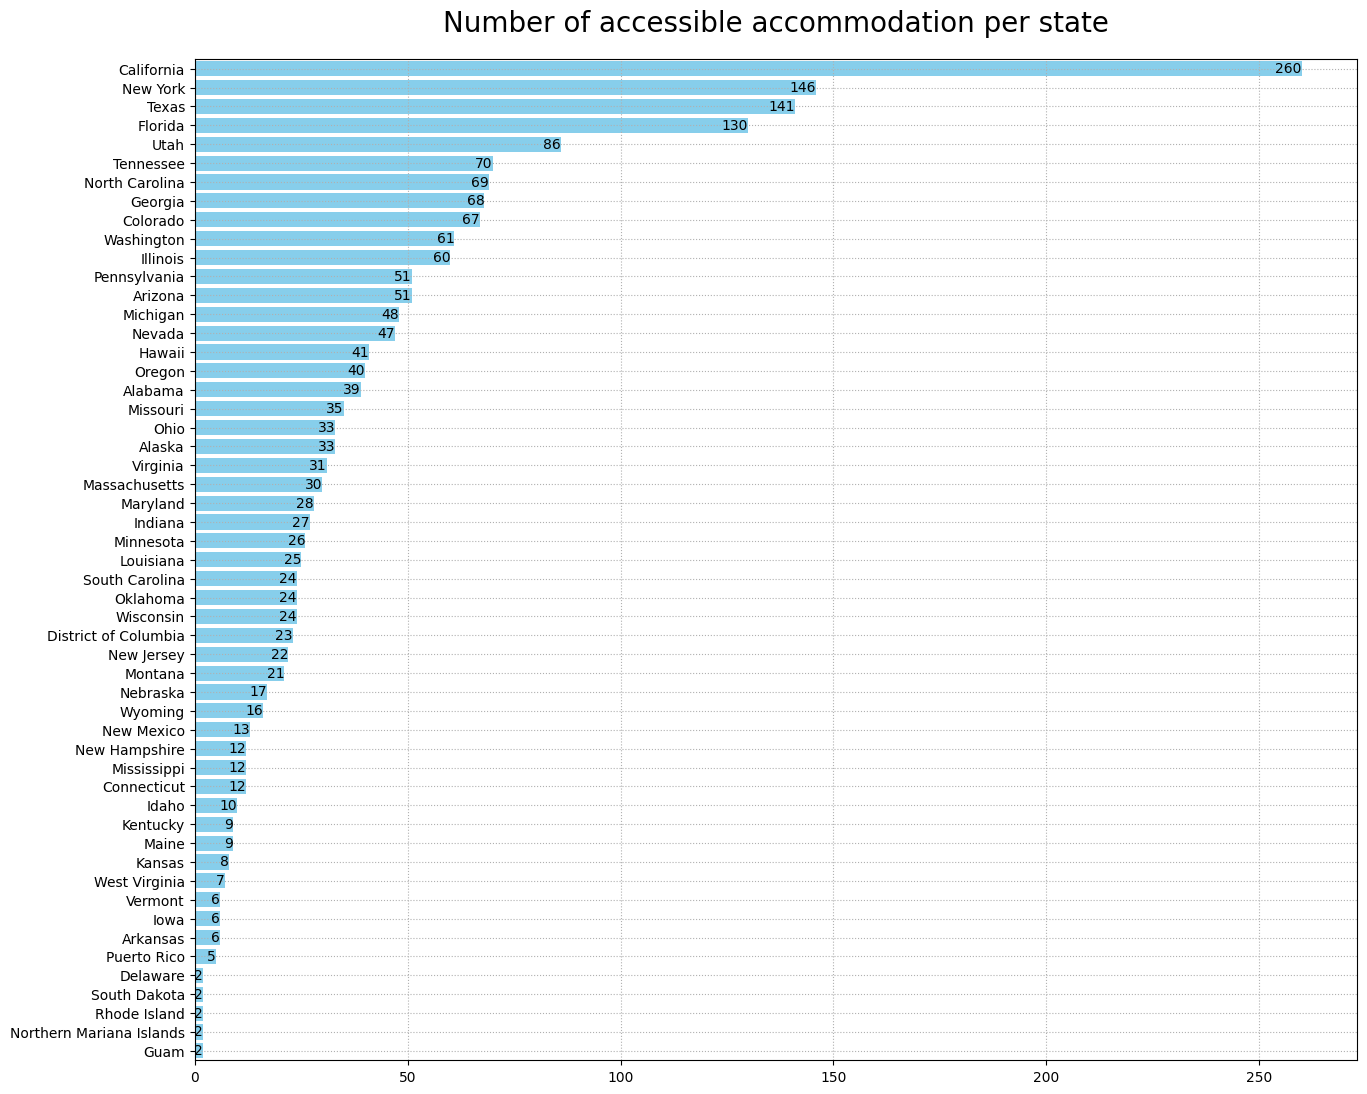

In [170]:
import matplotlib.pyplot as plt
import pandas as pd


# number of wheelchair friendly accommodation per state in our dataset

# frequency of unqiue values in State 
result = []
for index, value in accom_without_dupl['State'].value_counts(ascending=True).items():
    #print(index, value)
    dict = {}
    dict[index] = value
    result.append(dict)
result

#converting list of dictionaries to a single dictionary d1
d1={}
for i in result:
    d1.update(i)

# creating variables for axis
states = list(d1.keys())
count = list(d1.values())

#setting up figure size 
fig, ax = plt.subplots(figsize=(15, 13))

#Function to add labels to the bars
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(y[i], i, y[i], ha='right', va='center', fontsize=10, color='black')

#plotting horizontal bar chart
ax.barh(range(len(d1)), count, tick_label=states,color='skyblue')
ax.tick_params(axis='both', labelsize=10)
ax.grid(linestyle='dotted')
ax.set_title('Number of accessible accommodation per state',fontsize=20,pad=20)
addlabels(states,count)
# Set the x-axis limit to start from 0
ax.set_ylim(-0.5, len(states) - 0.5)  # Set x-axis to start from 0 and end at slightly more than max value
plt.show()

#outocome: Our dataset comes from Overpass Turbo which extracts wheelchair accessible accommodation (hotel, caravan_site, camp_site, hostel, guest_house, apartment) from OpenStreetMap across USA. 
# This is a free publicly populated database and as such it heavily depends on individual input. It suffers from inconsistent coverage, meaning some areas, especially rural, will have fewer - possibly incomplete - or not up-to-date records in comparison to urban areas. 
# As we can see from below chart, Arkansas has only 6 records of wheelchair accessible accommodation unlike New York with 146 records. 


## __DELIVERABLE FOR GROUP NOTEBOOK - ENTRANCE COST vs. TEMPERATURE__

I would like to check if level of entrance fees/passes has any correlation to average temperature. Would colder parks have lower entrance fees/passes?

What I need to do:
- first I need to merge fees&passes file with my team member Omone's mean_temparatures file
- because Omone's file doesn't include park code, I will populate it into Omone's file from accessibility file as they can be merged on "park name" column
- I will download accessibility and mean_temperatures files and merge them on column park name
- resulted file I will merge with fees_passes file
- try to run scatter plot and heatmap to check if there is any correlation

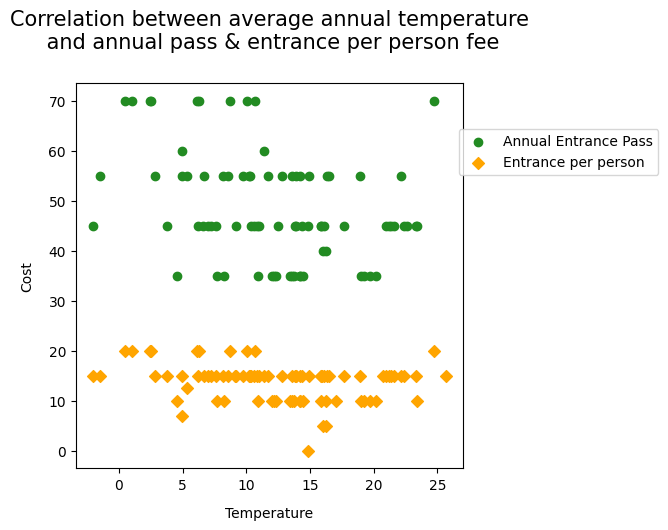

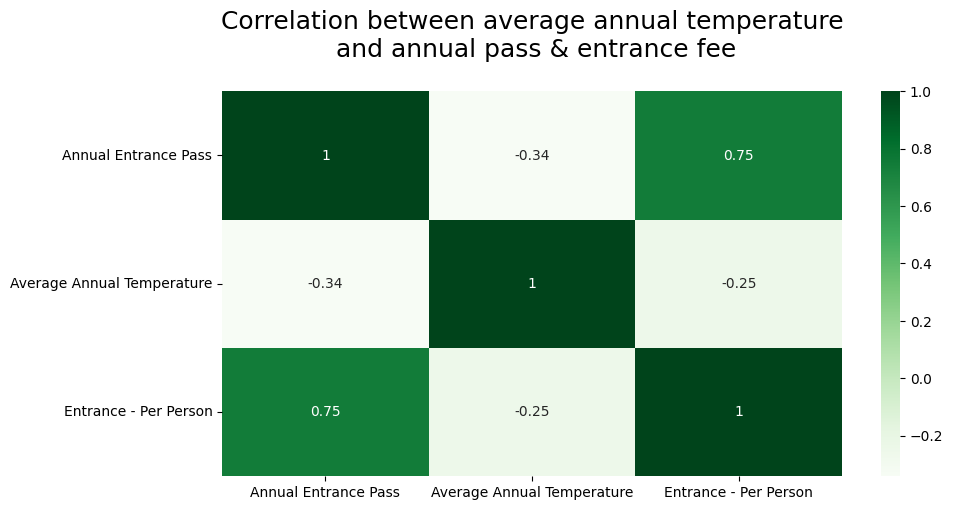

<Figure size 500x400 with 0 Axes>

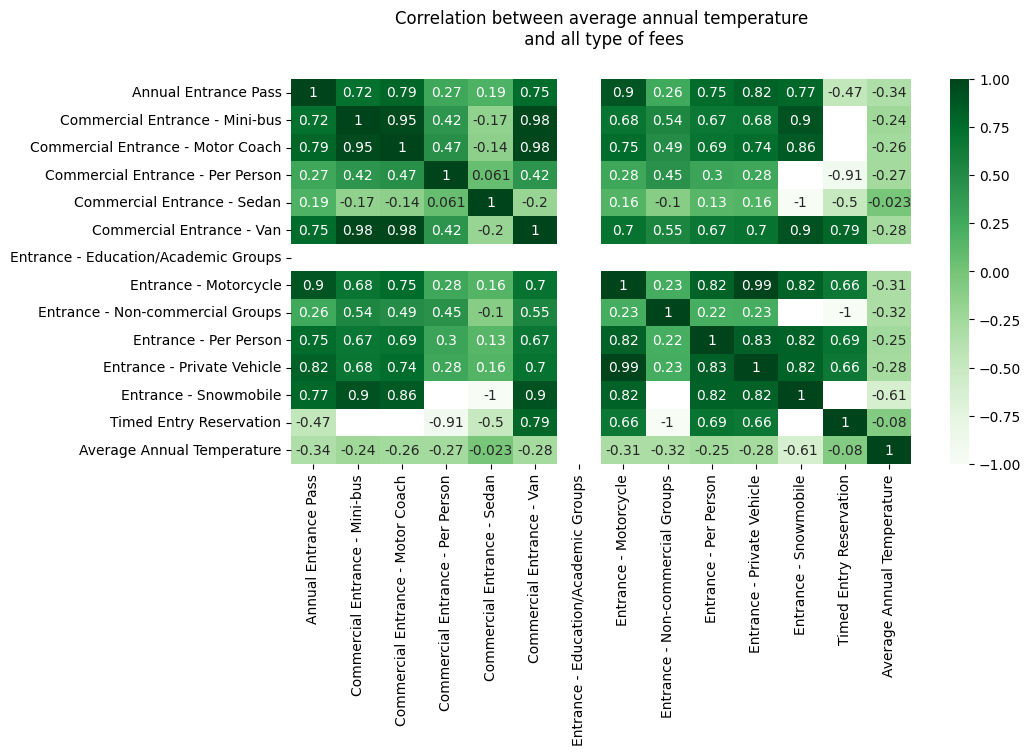

In [287]:
# this is a copy of all code below to be included into shared group notebook

# copy of the all code written below this cell to get deliverable - fees vs. temperature 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

access_df = pd.read_csv("files-to-merge/accessibility_features_and_parks.csv") #Park Name
temp_df = pd.read_csv("files-to-merge/Mean_temperatures.csv") # park_name

# renaming visitor_df "park_name" to "Park Name" to allow smooth merging both datasets together
temp_df.rename(columns={'park_name':'Park Name'},inplace=True)

# merging accessibility and visitors dataframes on column "Park Name" and we do left join as Rosie's accessibility has more records (to ensure we keep them)
merged_df1 = pd.merge(access_df,temp_df,on='Park Name',how='left')

# drop columns I do not need for comparing temperatures with fees, if I drop accessiblity features I will be able to drop duplicated rows
merged_df1.drop(columns=['Accessibility Feature'],inplace=True)

#dropping duplicated rows
merged_df1_no_dupl = merged_df1.drop_duplicates(ignore_index=True)

# saving fees file into dataframe
fees = pd.read_csv("cleaned_usa_nsp_fees_passes.csv")

# merging with fees data
merged_df2 = pd.merge(merged_df1_no_dupl,fees,on='Park Code',how='left')

# calculate total annual termperature per park
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#create a new column Average Annual Temperature
merged_df2['Average Annual Temperature'] = merged_df2[months].mean(axis=1)

# check correlation between avg temperature and annual pass/single entrance
plt.figure(figsize=(5,5))
plt.scatter(merged_df2['Average Annual Temperature'],merged_df2['Annual Entrance Pass'],color='forestgreen',marker='o',label='Annual Entrance Pass')
plt.scatter(merged_df2['Average Annual Temperature'],merged_df2['Entrance - Per Person'],color='orange',marker='D',label='Entrance per person')
plt.title('Correlation between average annual temperature\n and annual pass & entrance per person fee', pad=25, fontsize=15)
plt.xlabel('Temperature',labelpad=10)
plt.ylabel('Cost',labelpad=10)
plt.legend(bbox_to_anchor=(0.97,0.9))
plt.show()

# outcome:  there seems to be a slightly negative correlation between annual entrance pass and avg. temperature, especially parks with the highest annual entrance pass seem to fall into lower range of average temperatures. 
#           Individual entrance per person is not showing any apparent correlation on the scatter plot. 

print('\n')
print('\n')

# create heatmap to see if there is any correlation between temperature and annual pass & single entrance
pass_temp = merged_df2[['Annual Entrance Pass','Average Annual Temperature','Entrance - Per Person']]

plt.figure(figsize = (10,5))
correlation_matrix = pass_temp.corr()

sns.heatmap(data = correlation_matrix, annot = True,cmap="Greens")
plt.title('Correlation between average annual temperature\n and annual pass & entrance fee', pad =25,fontsize=18)
plt.figure(figsize = (5,4))
plt.show()

#outcome:   Heatmap shows us slightly negative correlation between avg. annual temp and annual entrance pass at -0.34. 
#           Similiarly we can observe slightly negative correlation between avg. temperature and individual entrance at -0.25. However, we need to remember our data sample is quite small with only 303 parks. 

print('\n')
print('\n')

# create heatmap to see if there is any correlation between temperature and all different types of entrance cost
all_fees = merged_df2.drop(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Park Name','Park Code'])
plt.figure(figsize = (10,5))
correlation_matrix = all_fees.corr()

sns.heatmap(data = correlation_matrix, annot = True,cmap="Greens")
plt.title('Correlation between average annual temperature\n and all type of fees',pad=25)
plt.show()

# outocme:   The only relevant column/row in this heatmap is Average Annual Temperature. 
#           We can see that all entrance fees/pass has slightly negative correlation meaning parks with colder temperatures tend to have slightly higher entrance fees and vice versa.


# overall outcome:  All charts point at slightly negative correlation between avg. temperature and entrance cost. 
#                   This could be explained by higher running costs of parks located in colder, often mountanious, areas driven by multiple factors such:
#                               - shorter open season due to harsh weather, 
#                               - snow & ice management requiring special equipment, 
#                               - damaged infrastructure (e.g. roads) due to fluctuating temperatures,
#                               - heating costs

In [288]:
import pandas as pd
access_df = pd.read_csv("files-to-merge/accessibility_features_and_parks.csv") #Park Name
temp_df = pd.read_csv("files-to-merge/Mean_temperatures.csv") # park_name

In [289]:
access_df.shape

(1438, 3)

In [290]:
temp_df.shape

(470, 13)

In [293]:
# renaming visitor_df "park_name" to "Park Name" to allow smooth merging both datasets together
temp_df.rename(columns={'park_name':'Park Name'},inplace=True)
temp_df

,Park Name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Abraham Lincoln Birthplace National Historical...,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
1,Acadia National Park,-2.675941,-3.084623,0.990412,6.454722,11.582303,16.185833,19.929973,19.791398,16.834074,12.383692,5.096250,0.993817
2,Adams National Historical Park,-0.311649,0.139980,4.013754,9.028981,14.737186,19.575602,23.100538,22.614337,18.753796,13.897849,6.758102,3.297088
3,African American Civil War Memorial,2.701254,4.376091,8.424238,13.584769,17.753943,22.887824,25.828360,24.967249,21.330741,15.388530,8.452176,5.380108
4,African Burial Ground National Monument,0.902733,1.134425,5.401927,10.918565,15.704211,20.854815,24.633154,24.000224,20.057963,14.482034,7.462685,4.050179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Yorktown Battlefield Part of Colonial National...,5.233871,6.964385,10.617697,15.066343,18.634543,23.093148,26.409857,25.693504,22.596435,16.816711,10.904954,7.930466
466,Yosemite National Park,-5.783333,-5.870437,-5.118952,-0.952037,2.385170,9.403843,15.479122,13.692832,10.309120,4.268548,-2.551898,-5.067115
467,Yucca House National Monument,-2.009140,-1.221627,2.891263,10.798889,17.595744,23.074120,26.659453,24.106362,20.252685,11.512142,5.082361,0.594534
468,Yukon - Charley Rivers National Preserve,-15.517966,-18.991270,-13.200941,-6.146620,5.445520,12.782037,15.566308,12.341711,4.382176,-4.282661,-12.954259,-17.004167


In [294]:
# merging accessibility and visitors dataframes on column "Park Name" and we do left join as Rosie's accessibility has more records (to ensure we keep them)
merged_df1 = pd.merge(access_df,temp_df,on='Park Name',how='left')
merged_df1

,Accessibility Feature,Park Name,Park Code,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Accessible Rooms,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
1,Accessible Rooms,Acadia National Park,acad,-2.675941,-3.084623,0.990412,6.454722,11.582303,16.185833,19.929973,19.791398,16.834074,12.383692,5.096250,0.993817
2,Accessible Rooms,Alcatraz Island,alca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accessible Rooms,Allegheny Portage Railroad National Historic Site,alpo,-3.537724,-2.386062,2.370520,7.432685,12.499821,17.512824,20.237231,19.696998,15.564213,10.259140,3.060139,0.402375
4,Accessible Rooms,Badlands National Park,badl,-1.652016,-4.563046,2.037007,6.176667,14.676792,21.476667,24.648297,23.769937,19.635926,10.165815,3.063565,-2.609409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Wheelchairs Available,Vicksburg National Military Park,vick,9.371864,9.913294,15.043414,17.594028,22.770833,26.836435,28.058961,27.950134,24.935417,20.067070,13.283148,12.502599
1434,Wheelchairs Available,Virgin Islands National Park,viis,24.364875,23.974802,24.037366,24.395370,25.619220,26.325000,26.682482,26.979122,27.277639,26.922222,26.253519,25.293952
1435,Wheelchairs Available,Wind Cave National Park,wica,-1.348611,-4.413790,0.982796,5.398333,12.878987,19.370833,22.713306,22.132258,18.486759,9.529659,3.052130,-1.339023
1436,Wheelchairs Available,Yosemite National Park,yose,-5.783333,-5.870437,-5.118952,-0.952037,2.385170,9.403843,15.479122,13.692832,10.309120,4.268548,-2.551898,-5.067115


In [295]:
# drop columns I do not need for comparing temperatures with fees, if I drop accessiblity features I will be able to drop duplicated rows
merged_df1.drop(columns=['Accessibility Feature'],inplace=True)

In [296]:
# checking for duplicated rows 
merged_df1_sort = merged_df1.sort_values(by=['Park Code','Park Name'])
merged_df1_sort

,Park Name,Park Code,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
129,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
735,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
1093,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
1,Acadia National Park,acad,-2.675941,-3.084623,0.990412,6.454722,11.582303,16.185833,19.929973,19.791398,16.834074,12.383692,5.096250,0.993817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Zion National Park,zion,-2.143548,-1.210466,1.643459,8.661250,14.809722,20.964907,24.703136,21.611246,18.250370,10.247625,3.856204,-0.308199
626,Zion National Park,zion,-2.143548,-1.210466,1.643459,8.661250,14.809722,20.964907,24.703136,21.611246,18.250370,10.247625,3.856204,-0.308199
1007,Zion National Park,zion,-2.143548,-1.210466,1.643459,8.661250,14.809722,20.964907,24.703136,21.611246,18.250370,10.247625,3.856204,-0.308199
1376,Zion National Park,zion,-2.143548,-1.210466,1.643459,8.661250,14.809722,20.964907,24.703136,21.611246,18.250370,10.247625,3.856204,-0.308199


In [297]:
#dropping duplicated rows
merged_df1_no_dupl = merged_df1.drop_duplicates(ignore_index=True)
merged_df1_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Name  330 non-null    object 
 1   Park Code  330 non-null    object 
 2   Jan        305 non-null    float64
 3   Feb        305 non-null    float64
 4   Mar        305 non-null    float64
 5   Apr        305 non-null    float64
 6   May        305 non-null    float64
 7   Jun        305 non-null    float64
 8   Jul        305 non-null    float64
 9   Aug        305 non-null    float64
 10  Sep        305 non-null    float64
 11  Oct        305 non-null    float64
 12  Nov        305 non-null    float64
 13  Dec        305 non-null    float64
dtypes: float64(12), object(2)
memory usage: 36.2+ KB


In [298]:
#checking how many different park codes we have in original data set and if it matching the  above 330 non-null values, if it does than we have 330 unqiue park codes
merged_df1['Park Code'].nunique()

330

In [299]:
merged_df1_no_dupl.shape

(330, 14)

In [300]:
merged_df1_no_dupl

,Park Name,Park Code,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,20.734167,15.303495,7.905231,6.147805
1,Acadia National Park,acad,-2.675941,-3.084623,0.990412,6.454722,11.582303,16.185833,19.929973,19.791398,16.834074,12.383692,5.096250,0.993817
2,Alcatraz Island,alca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allegheny Portage Railroad National Historic Site,alpo,-3.537724,-2.386062,2.370520,7.432685,12.499821,17.512824,20.237231,19.696998,15.564213,10.259140,3.060139,0.402375
4,Badlands National Park,badl,-1.652016,-4.563046,2.037007,6.176667,14.676792,21.476667,24.648297,23.769937,19.635926,10.165815,3.063565,-2.609409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Waco Mammoth National Monument,waco,10.375134,9.019048,16.086828,19.576019,23.823746,28.841759,31.083244,31.238441,28.119861,21.881093,14.597593,13.479301
326,Washington-Rochambeau Revolutionary Route Nati...,waro,1.928719,2.607242,6.898656,12.237315,17.107930,22.257778,25.818459,25.131138,20.991435,15.277643,8.149306,4.843862
327,Whitman Mission National Historic Site,whmi,3.217966,3.468006,8.066308,10.806157,16.716129,22.427454,27.978271,26.544086,20.301065,13.591039,5.147315,2.148073
328,World War I Memorial,wwim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
# saving fees file into dataframe
import pandas as pd
fees = pd.read_csv("cleaned_usa_nsp_fees_passes.csv")
fees

,Park Code,Annual Entrance Pass,Commercial Entrance - Mini-bus,Commercial Entrance - Motor Coach,Commercial Entrance - Per Person,Commercial Entrance - Sedan,Commercial Entrance - Van,Entrance - Education/Academic Groups,Entrance - Motorcycle,Entrance - Non-commercial Groups,Entrance - Per Person,Entrance - Private Vehicle,Entrance - Snowmobile,Timed Entry Reservation
0,acad,70.0,NaN,NaN,0.0,NaN,NaN,0.0,30.0,0.0,20.0,35.0,NaN,6.0
1,adam,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0
2,anti,35.0,40.0,100.0,NaN,25.0,NaN,0.0,15.0,NaN,10.0,20.0,NaN,NaN
3,arch,55.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,15.0,30.0,NaN,2.0
4,asis,45.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,0.0,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,wupa,45.0,100.0,100.0,NaN,28.0,40.0,0.0,20.0,15.0,15.0,25.0,NaN,NaN
114,yell,70.0,200.0,300.0,NaN,20.0,125.0,NaN,30.0,20.0,20.0,35.0,30.0,NaN
115,york,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
116,yose,70.0,200.0,300.0,20.0,25.0,125.0,0.0,30.0,300.0,20.0,35.0,NaN,2.0


In [302]:
#checking what type of merge i will do, left or right
print(fees.shape)
print(merged_df1_no_dupl.shape)

(118, 14)
(330, 14)


In [303]:
# merging with fees data
merged_df2 = pd.merge(merged_df1_no_dupl,fees,on='Park Code',how='left')
merged_df2

,Park Name,Park Code,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Commercial Entrance - Per Person,Commercial Entrance - Sedan,Commercial Entrance - Van,Entrance - Education/Academic Groups,Entrance - Motorcycle,Entrance - Non-commercial Groups,Entrance - Per Person,Entrance - Private Vehicle,Entrance - Snowmobile,Timed Entry Reservation
0,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,acad,-2.675941,-3.084623,0.990412,6.454722,11.582303,16.185833,19.929973,19.791398,...,0.0,NaN,NaN,0.0,30.0,0.0,20.0,35.0,NaN,6.0
2,Alcatraz Island,alca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allegheny Portage Railroad National Historic Site,alpo,-3.537724,-2.386062,2.370520,7.432685,12.499821,17.512824,20.237231,19.696998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Badlands National Park,badl,-1.652016,-4.563046,2.037007,6.176667,14.676792,21.476667,24.648297,23.769937,...,NaN,25.0,50.0,NaN,25.0,NaN,15.0,30.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Waco Mammoth National Monument,waco,10.375134,9.019048,16.086828,19.576019,23.823746,28.841759,31.083244,31.238441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,Washington-Rochambeau Revolutionary Route Nati...,waro,1.928719,2.607242,6.898656,12.237315,17.107930,22.257778,25.818459,25.131138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,Whitman Mission National Historic Site,whmi,3.217966,3.468006,8.066308,10.806157,16.716129,22.427454,27.978271,26.544086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,World War I Memorial,wwim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
# calculate total annual termperaturre per park
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#create a new column Average Annual Temperature
merged_df2['Average Annual Temperature'] = merged_df2[months].mean(axis=1)
merged_df2

,Park Name,Park Code,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Commercial Entrance - Sedan,Commercial Entrance - Van,Entrance - Education/Academic Groups,Entrance - Motorcycle,Entrance - Non-commercial Groups,Entrance - Per Person,Entrance - Private Vehicle,Entrance - Snowmobile,Timed Entry Reservation,Average Annual Temperature
0,Abraham Lincoln Birthplace National Historical...,abli,2.416935,3.808631,9.172894,12.686343,18.336738,22.882593,24.808423,24.102823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.025506
1,Acadia National Park,acad,-2.675941,-3.084623,0.990412,6.454722,11.582303,16.185833,19.929973,19.791398,...,NaN,NaN,0.0,30.0,0.0,20.0,35.0,NaN,6.0,8.706826
2,Alcatraz Island,alca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Allegheny Portage Railroad National Historic Site,alpo,-3.537724,-2.386062,2.370520,7.432685,12.499821,17.512824,20.237231,19.696998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.592680
4,Badlands National Park,badl,-1.652016,-4.563046,2.037007,6.176667,14.676792,21.476667,24.648297,23.769937,...,25.0,50.0,NaN,25.0,NaN,15.0,30.0,NaN,NaN,9.735517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Waco Mammoth National Monument,waco,10.375134,9.019048,16.086828,19.576019,23.823746,28.841759,31.083244,31.238441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.676839
326,Washington-Rochambeau Revolutionary Route Nati...,waro,1.928719,2.607242,6.898656,12.237315,17.107930,22.257778,25.818459,25.131138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.604124
327,Whitman Mission National Historic Site,whmi,3.217966,3.468006,8.066308,10.806157,16.716129,22.427454,27.978271,26.544086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.367656
328,World War I Memorial,wwim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
print(merged_df2['Park Code'].nunique())
print(merged_df2['Average Annual Temperature'].nunique())

#outcome: we have 330 parks, but only 303 parks have temperature against them

330
303


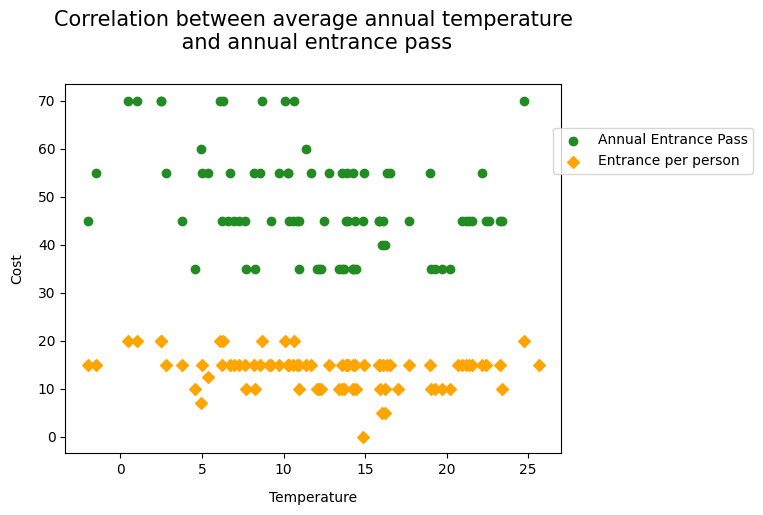

In [306]:

# check correlation between avg temperature and annual pass/single entrance
import matplotlib.pyplot as plt


plt.scatter(merged_df2['Average Annual Temperature'],merged_df2['Annual Entrance Pass'],color='forestgreen',marker='o',label='Annual Entrance Pass')
plt.scatter(merged_df2['Average Annual Temperature'],merged_df2['Entrance - Per Person'],color='orange',marker='D',label='Entrance per person')
plt.title('Correlation between average annual temperature\n and annual entrance pass', pad=25, fontsize=15)
plt.xlabel('Temperature',labelpad=10)
plt.ylabel('Cost',labelpad=10)
plt.legend(bbox_to_anchor=(0.97,0.9))
plt.show()

# outcome:  there seems to be a slightly negative correlation between annual entrance pass and avg. temperature, especially parks with the highest annual entrance pass seem to fall into lower range of average temperatures. 
#           Individual entrance per person is not showing any apparent correlation on the scatter plot. 

In [307]:
pass_temp = merged_df2[['Annual Entrance Pass','Average Annual Temperature','Entrance - Per Person']]
pass_temp

,Annual Entrance Pass,Average Annual Temperature,Entrance - Per Person
0,NaN,14.025506,NaN
1,70.0,8.706826,20.0
2,NaN,NaN,NaN
3,NaN,8.592680,NaN
4,55.0,9.735517,15.0
...,...,...,...
325,NaN,20.676839,NaN
326,NaN,13.604124,NaN
327,NaN,13.367656,NaN
328,NaN,NaN,NaN


In [308]:
pass_temp[['Annual Entrance Pass','Average Annual Temperature','Entrance - Per Person']].value_counts()

Annual Entrance Pass  Average Annual Temperature  Entrance - Per Person
35.0                  14.250788                   10.0                     2
                      4.561740                    10.0                     1
                      8.231225                    10.0                     1
                      7.673237                    10.0                     1
                      10.942148                   10.0                     1
                                                                          ..
70.0                  6.260872                    20.0                     1
                      8.706826                    20.0                     1
                      10.090476                   20.0                     1
                      10.658154                   20.0                     1
                      24.746073                   20.0                     1
Name: count, Length: 76, dtype: int64

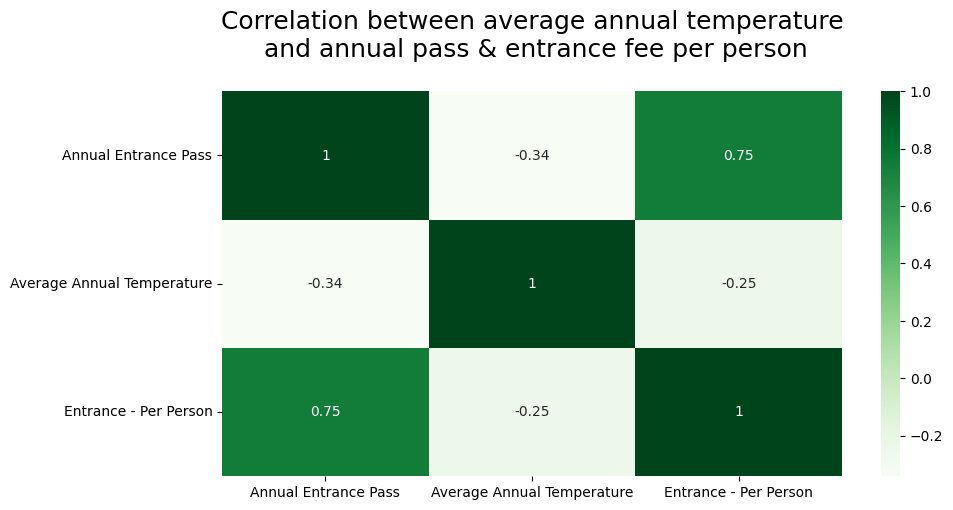

<Figure size 500x400 with 0 Axes>

In [309]:
# create heatmap to see if there is any correlation between temperature and entrance cost
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
correlation_matrix = pass_temp.corr()

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = correlation_matrix, annot = True,cmap="Greens")
plt.title('Correlation between average annual temperature\n and annual pass & entrance fee per person', pad =25,fontsize=18)
plt.figure(figsize = (5,4))
plt.show()

#outcome:   Heatmap shows us slightly negative correlation between avg. annual temp and annual entrance pass at -0.34. 
#           Similiarly we can observe slightly negative correlation between avg. temperature and individual entrance at -0.25. However, we need to remember our data sample is quite small with only 303 parks. 

In [310]:
merged_df2.keys()

Index(['Park Name', 'Park Code', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual Entrance Pass',
       'Commercial Entrance - Mini-bus', 'Commercial Entrance - Motor Coach',
       'Commercial Entrance - Per Person', 'Commercial Entrance - Sedan',
       'Commercial Entrance - Van', 'Entrance - Education/Academic Groups',
       'Entrance - Motorcycle', 'Entrance - Non-commercial Groups',
       'Entrance - Per Person', 'Entrance - Private Vehicle',
       'Entrance - Snowmobile', 'Timed Entry Reservation',
       'Average Annual Temperature'],
      dtype='object')

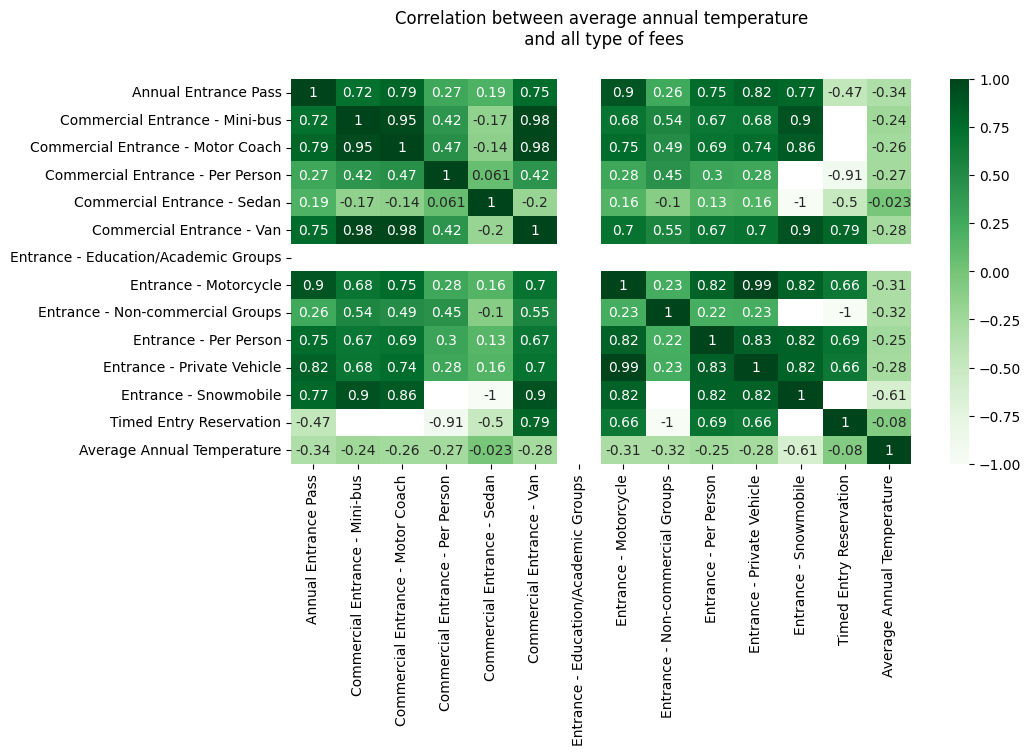

In [311]:
# create heatmap to see if there is any correlation between temperature and entrance cost
import seaborn as sns
import matplotlib.pyplot as plt

all_fees = merged_df2.drop(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Park Name','Park Code'])
plt.figure(figsize = (10,5))
correlation_matrix = all_fees.corr()

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = correlation_matrix, annot = True,cmap="Greens")
plt.title('Correlation between average annual temperature\n and all type of fees',pad=25)
plt.show()

#outocme:   The only relevant column/row in this heatmap is Average Annual Temperature. 
#           We can see that all entrance fees/pass has slightly negative correlation meaning parks with colder temperatures tend to have slightly higher entrance fees and vice versa.


# overall outcome:  All charts point at slightly negative correlation between avg. temperature and entrance cost. 
#                   This could be explained by higher running costs of parks located in colder, often mountanious, areas driven by multiple factors such:
#                               - shorter open season due to harsh weather, 
#                               - snow & ice management requiring special equipment, 
#                               - damaged infrastructure (e.g. roads) due to fluctuating temperatures,
#                               - heating costs
